# Support Vector Regressor Implementation

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Creating the synthetic Data Points 
from sklearn.datasets import make_regression

In [28]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [29]:
X

array([[ 1.78587274, -1.53485312],
       [-0.32103129, -1.10732249],
       [ 0.19170644, -0.20613883],
       ...,
       [-1.05105599, -0.91721126],
       [-0.37548218, -0.18084132],
       [-2.56491762, -0.21228972]])

In [30]:
y

array([ 1.18548280e+02, -3.49955334e+01,  1.15126763e+01, -7.00223064e+01,
        1.48066367e+02, -9.42604922e+01,  6.36751274e+01, -2.90015024e+01,
       -1.69880224e+02, -3.09145968e+01,  2.80879795e+01,  9.24164041e+01,
        1.17368851e+02,  5.33106445e+01,  5.46103494e+01,  2.00944828e+01,
       -8.37772740e+01, -9.37067351e+01,  3.62100178e+01,  7.59261035e+01,
       -1.29700883e+02,  1.02309848e+02, -1.91525998e+02,  7.91874544e+01,
       -1.52311175e+01, -5.28116118e+01, -3.49568668e+01, -4.99773190e+00,
       -4.45606700e+01,  4.24704247e+01,  1.10575035e+02,  4.21771286e+01,
        6.32737263e+01, -6.37316617e+01, -4.57531319e+01,  1.01845176e+02,
        1.24248651e+02, -1.06892102e+01, -1.88644039e+01,  7.50149205e+01,
       -1.87276428e+01,  1.13711384e+02,  4.47784514e+00,  6.62067289e+01,
       -3.58068821e+01, -8.36081353e+01, -3.28230334e+01,  7.94331195e+01,
       -2.97715910e+01,  1.46759610e+02,  1.09742110e+02, -8.34585771e+01,
       -3.76246695e+01,  

In [31]:
pd.DataFrame(X)[0]

0      1.785873
1     -0.321031
2      0.191706
3     -0.897600
4      1.987182
         ...   
995   -0.210854
996    0.133635
997   -1.051056
998   -0.375482
999   -2.564918
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

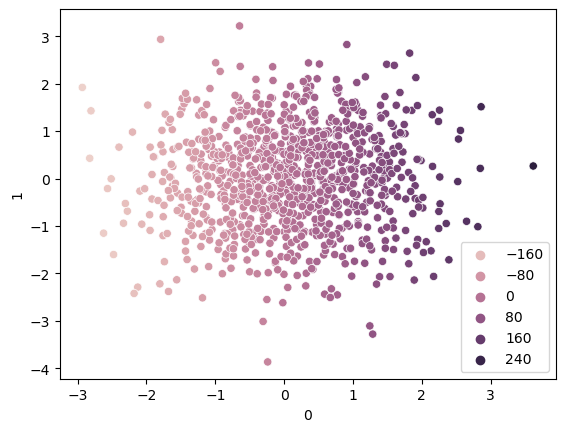

In [32]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [34]:
from sklearn.svm import SVR

In [35]:
svr=SVR(kernel='linear')

In [36]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [37]:
svr.coef_

array([[72.96670685,  5.01479187]])

In [38]:
# Prediction
y_pred=svr.predict(X_test)
y_pred

array([ -99.22010248,  -21.24006736,   34.45074407,   45.4765242 ,
         40.76414024,   -9.07510284,  158.47956298,   23.56340846,
         90.69578845,   43.12687184,   34.67338471,    9.04346076,
        -69.66336315,   95.13808973,  -85.5613184 ,    1.9497951 ,
        -26.31506943,   38.35940396,  -64.29611869,  136.5424931 ,
         27.07426219,  140.1942125 ,   15.96345702,   14.76339826,
         16.20856044,  -81.89371939,   -2.1589074 ,  123.16075452,
        -47.93913671,    6.95877159,   63.9392023 ,   16.00524042,
       -116.21312398,   45.46707785,   20.87983435,   40.89792947,
        -20.22404099,   39.90980499,   52.44052465,  -19.97649979,
         62.42429046,   41.69381509,  -14.10097067,    5.62565556,
        -85.40948968,  113.07469363,  265.17448802,   83.18781787,
          0.79353449,  139.45858587,   -4.91633047,  -64.7073828 ,
       -102.62376446,  -15.78221706, -112.33337817,   94.70689365,
       -113.4754692 ,  -89.34755125,   35.62068251, -188.83111

In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9982126538447625


## Hyperparameter Tunning with SVR

In [42]:
from sklearn.model_selection import GridSearchCV

# Defining the Parameter Range 
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['linear'],
           'epsilon':[0.1,0.2,0.3]
          }

In [43]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [50]:
grid.fit=(X_train,y_train)

In [51]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [52]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.